# Analyzing Wind Power Generation Data

This notebook utilizes 4 datasets from 4 power companies operating in Germany : 50 Hertz, Amprion, Tennet TSO and Transnet BW. The data contains power generation data observed between 23-08-2020 to 23-09-2020.

In this notebook we will try to analyze the power generation behavior and compare each dataset to find out the discrepancies between them.

### Libraries

Importing required libraries for processing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wind-power-generation/TenneTTSO.csv
/kaggle/input/wind-power-generation/50Hertz.csv
/kaggle/input/wind-power-generation/TransnetBW.csv
/kaggle/input/wind-power-generation/Amprion.csv


### Read Raw Data

Create dataframes from four CSV data that contains power generation from four German companies (50 Hertz, Amprion, Tennet TSO, Transnet BW).

For the first run, we try to analyze the dataset from 50Hertz.

In [2]:
df_50=pd.read_csv('/kaggle/input/wind-power-generation/50Hertz.csv')
x=df_50['Date']
df_50.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,74,73,63,55,54,53,51,52,45,...,68,68,63,61,57,52,51,49,45,40
1,24/08/2019,37,38,35,35,31,32,30,29,28,...,118,118,112,107,104,104,99,95,95,96
2,25/08/2019,93,88,85,81,76,80,81,76,73,...,111,108,103,96,93,88,86,82,80,77
3,26/08/2019,72,66,59,54,48,46,45,43,42,...,48,47,47,46,47,49,50,51,48,42
4,27/08/2019,39,38,36,36,34,31,31,30,31,...,54,53,51,52,51,52,54,54,56,59


Transpose the dataframe tables so we can summarize daily power generation

In [3]:
df_50S=df_50.T
df_50S=df_50S[1:]

#Remove 15 Minute Interval Index
df_50S.reset_index(drop=True, inplace=True)

#Sort All Columns Ascending
df_50S = pd.DataFrame(np.sort(df_50S.values, axis=0), index=df_50S.index, columns=df_50S.columns)
df_50S

,0,1,2,3,4,5,6,7,8,9,...,387,388,389,390,391,392,393,394,395,396
0,4,8,32,5,11,8,14,2,7,46,...,28,5,38,6,75,5,16,10,5,5
1,4,8,35,5,12,8,15,2,8,46,...,29,6,39,6,76,6,17,10,5,5
2,4,9,36,6,12,8,15,2,9,49,...,30,6,39,6,78,7,17,13,6,6
3,5,9,36,6,12,9,16,2,9,50,...,32,6,40,6,78,8,18,14,7,6
4,6,12,36,7,13,9,16,2,9,51,...,32,6,40,7,79,8,19,18,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,67,121,129,72,77,94,58,38,181,194,...,107,99,120,221,156,87,149,137,82,72
92,68,122,130,74,78,102,61,38,183,197,...,108,100,122,222,157,88,149,141,82,74
93,68,123,136,79,79,103,63,40,187,201,...,111,100,124,226,157,90,150,142,82,75
94,73,125,137,80,82,103,66,40,187,208,...,115,101,125,226,159,91,152,143,83,75


Extract daily maximum, median and minimum from the datasets.

In [4]:
y_median=np.zeros(397)
y_max=np.zeros(397)
y_min=np.zeros(397)
for i in range (0,397):
    y_max[i]=df_50S[i].max()
    y_median[i]=df_50S[i].median()
    y_min[i]=df_50S[i].min()

<function matplotlib.pyplot.show(*args, **kw)>

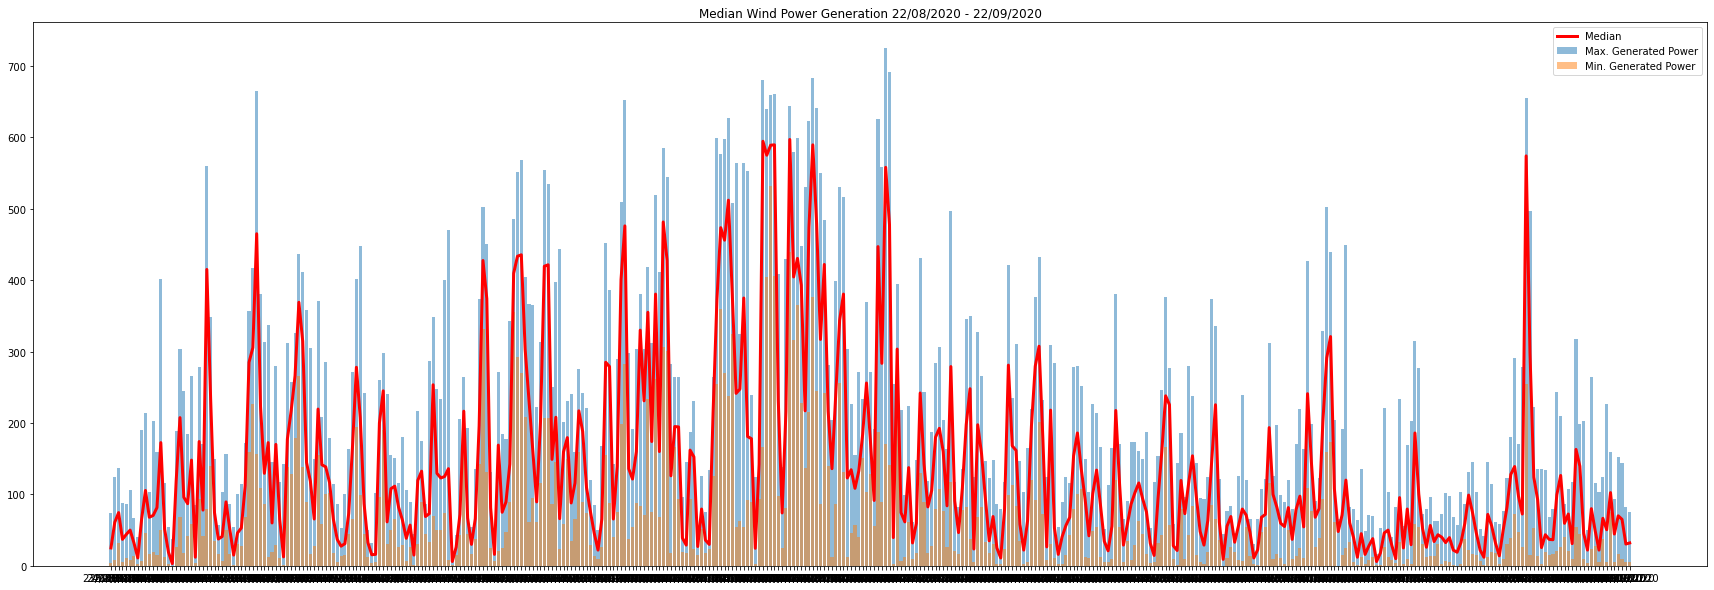

In [5]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(30,10))
ax=fig.add_subplot(1,1,1)
ax.bar(x,y_max,alpha=0.5,label='Max. Generated Power')
ax.plot(x,y_median,'r',linewidth=3.0,label='Median')
ax.bar(x,y_min,alpha=0.5,label='Min. Generated Power')
ax.legend()
ax.set_title("Median Wind Power Generation 22/08/2020 - 22/09/2020")
plt.show


We can see in the figure above that the turbines generate power in a fluctuating behavior. It is difficult to comprehend the data since there are many outliers/noise within the dataset.

### Applying Filter To Reduce Noise

Apply a one-dimensional filter to reduce noise so we can analyze the performance of the wind generators better.

<function matplotlib.pyplot.show(*args, **kw)>

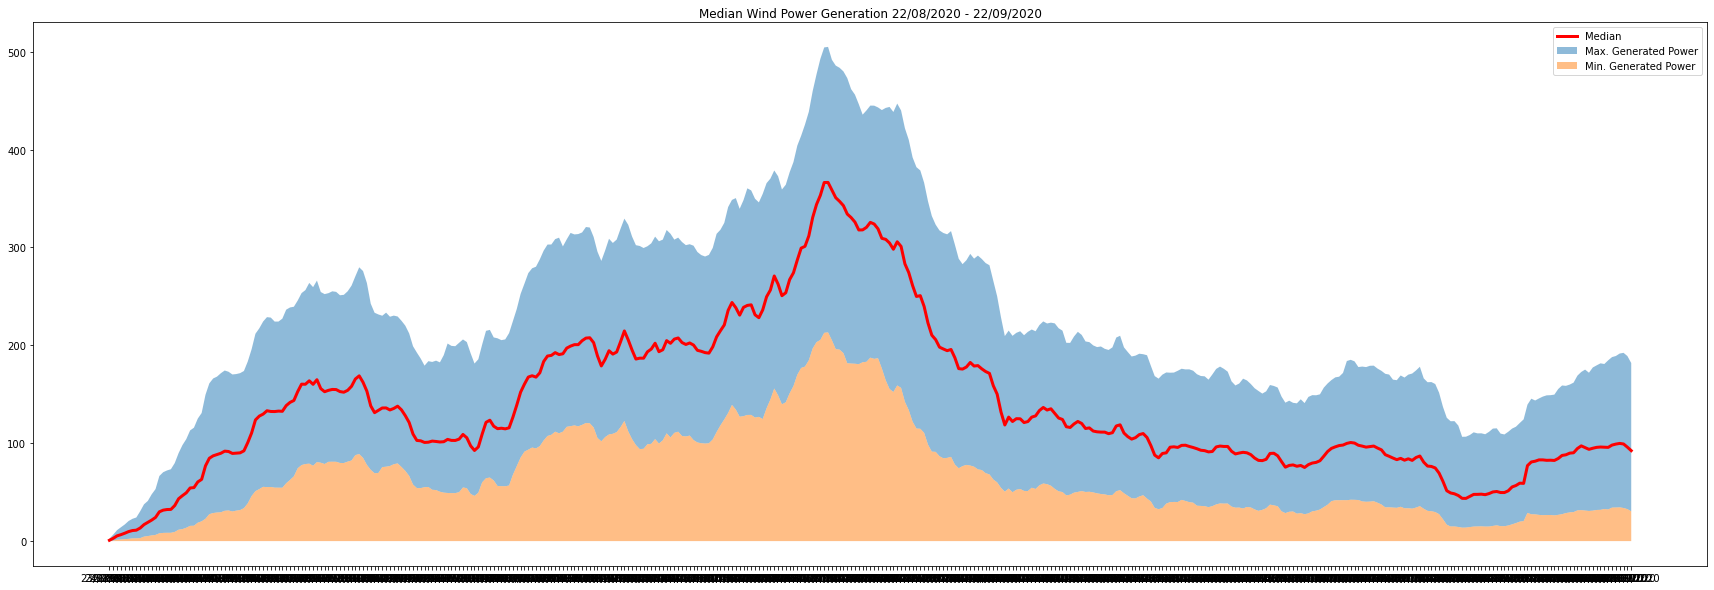

In [6]:
from scipy.signal import lfilter

n = 30 #the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy_max=lfilter(b,a,y_max)
yy_median=lfilter(b,a,y_median)
yy_min=lfilter(b,a,y_min)

fig=plt.figure(figsize=(30,10))
ax=fig.add_subplot(1,1,1)
ax.fill_between(x,yy_max,yy_min,alpha=0.5,label='Max. Generated Power')
ax.plot(x,yy_median,'r',linewidth=3.0,label='Median')
ax.fill_between(x,yy_min,0,alpha=0.5,label='Min. Generated Power')
ax.legend()
ax.set_title("Median Wind Power Generation 22/08/2020 - 22/09/2020")
plt.show

We can now see a clearer picture that the generated power peaks around the middle of the observation period.
Next, we will try to compare this with the other datasets, processed with the same approach.


In [7]:
#Store 50 Hertz Values
ymax_50h=yy_max
ymed_50h=yy_median
ymin_50h=yy_min

### Amprion Dataset

In [8]:
df_amp=pd.read_csv('/kaggle/input/wind-power-generation/Amprion.csv')
df_amp=df_amp.T
df_amp=df_amp[1:]
#Remove 15 Minute Interval Index
df_amp.reset_index(drop=True, inplace=True)
#Sort All Columns Ascending
df_amp = pd.DataFrame(np.sort(df_amp.values, axis=0), index=df_amp.index, columns=df_amp.columns)

#Extract Max, Min, Median
y_median=np.zeros(397)
y_max=np.zeros(397)
y_min=np.zeros(397)
for i in range (0,397):
    y_max[i]=df_amp[i].max()
    y_median[i]=df_amp[i].median()
    y_min[i]=df_amp[i].min()
    
#Filter
ymax_amp=lfilter(b,a,y_max)
ymed_amp=lfilter(b,a,y_median)
ymin_amp=lfilter(b,a,y_min)

### Tennet TSO Dataset

In [9]:
df_tso=pd.read_csv('/kaggle/input/wind-power-generation/TenneTTSO.csv')
df_tso=df_tso.T
df_tso=df_tso[1:]
#Remove 15 Minute Interval Index
df_tso.reset_index(drop=True, inplace=True)
#Sort All Columns Ascending
df_tso = pd.DataFrame(np.sort(df_tso.values, axis=0), index=df_tso.index, columns=df_tso.columns)

#Extract Max, Min, Median
y_median=np.zeros(397)
y_max=np.zeros(397)
y_min=np.zeros(397)
for i in range (0,397):
    y_max[i]=df_tso[i].max()
    y_median[i]=df_tso[i].median()
    y_min[i]=df_tso[i].min()
    
#Filter
ymax_tso=lfilter(b,a,y_max)
ymed_tso=lfilter(b,a,y_median)
ymin_tso=lfilter(b,a,y_min)

### Transnet BW Dataset

In [10]:
df_bw=pd.read_csv('/kaggle/input/wind-power-generation/TransnetBW.csv')
df_bw=df_bw.T
df_bw=df_bw[1:]
#Remove 15 Minute Interval Index
df_bw.reset_index(drop=True, inplace=True)
#Sort All Columns Ascending
df_bw = pd.DataFrame(np.sort(df_bw.values, axis=0), index=df_bw.index, columns=df_bw.columns)

#Extract Max, Min, Median
y_median=np.zeros(397)
y_max=np.zeros(397)
y_min=np.zeros(397)
for i in range (0,397):
    y_max[i]=df_bw[i].max()
    y_median[i]=df_bw[i].median()
    y_min[i]=df_bw[i].min()
    
#Filter
ymax_bw=lfilter(b,a,y_max)
ymed_bw=lfilter(b,a,y_median)
ymin_bw=lfilter(b,a,y_min)

### Visualize All Data

We can now plot the computed values in a single figure. For the sake of simplicity, we shall compare the median values.

<function matplotlib.pyplot.show(*args, **kw)>

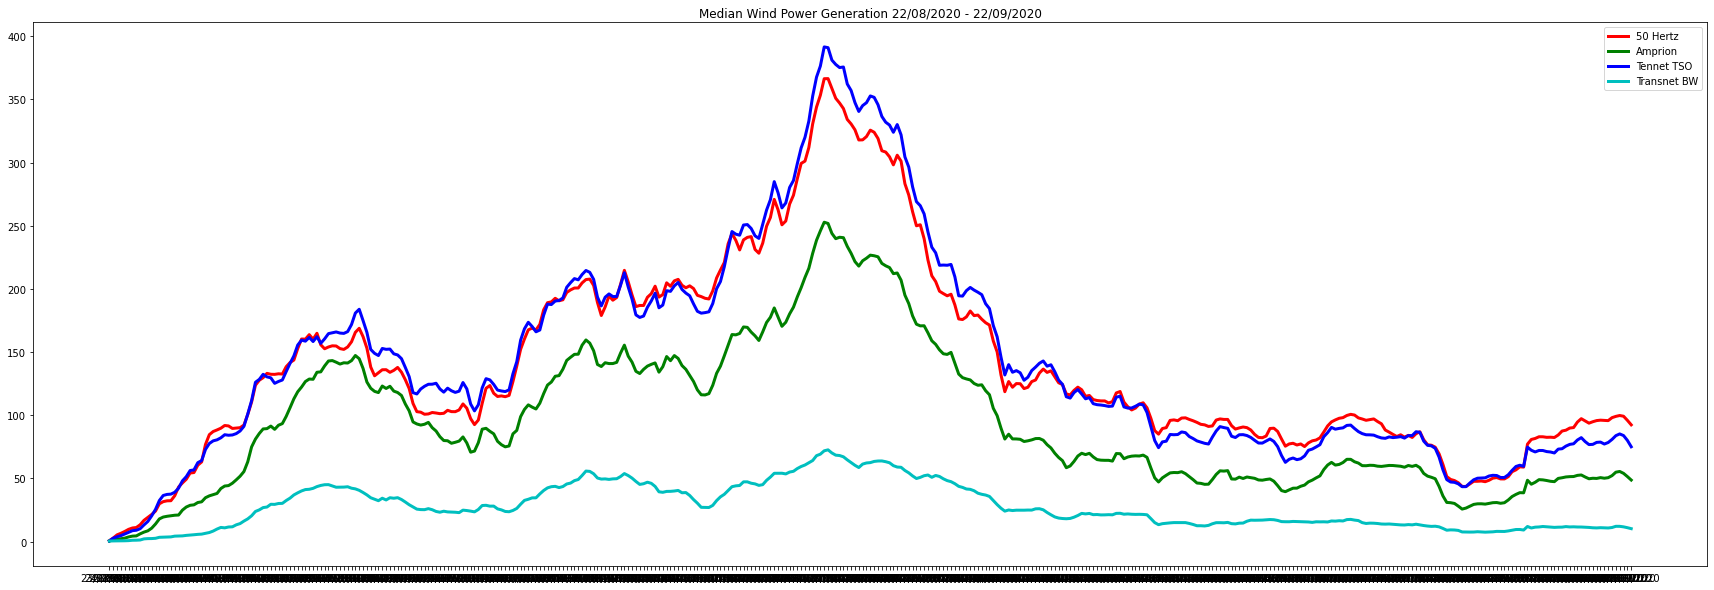

In [11]:
fig=plt.figure(figsize=(30,10))
ax=fig.add_subplot(1,1,1)
ax.plot(x,ymed_50h,'r',linewidth=3.0,label='50 Hertz')
ax.plot(x,ymed_amp,'g',linewidth=3.0,label='Amprion')
ax.plot(x,ymed_tso,'b',linewidth=3.0,label='Tennet TSO')
ax.plot(x,ymed_bw,'c',linewidth=3.0,label='Transnet BW')
ax.legend()
ax.set_title("Median Wind Power Generation 22/08/2020 - 22/09/2020")
plt.show

In the figure above, the power generation curves of 50 Hertz and Tennet TSO are fairly similar, while Amprion and Transnet BW show a lower amount of power generation during the observation period. However, this may be due to the limited operation area of Amprion and Transnet BW which only operate in certain areas of Germany. Which means, these two companies may not consider the power generated by turbines installed outside their area of operation.

### Measuring Difference Between 50 Hertz and Tennet TSO Dataset

For this process, we eliminate the dataset of Amprion and Transnet BW since they do not cover the entire country.
If we treat the curves as "signals", we can calculate the relative error between these two datasets.

ERROR = ∑|y1(n)−y2(n)|^2

NORMALIZED=∑|y1(n)−y2(n)|^2/∑|y1(n)|^2 (Relative error with respect to y1)

<function matplotlib.pyplot.show(*args, **kw)>

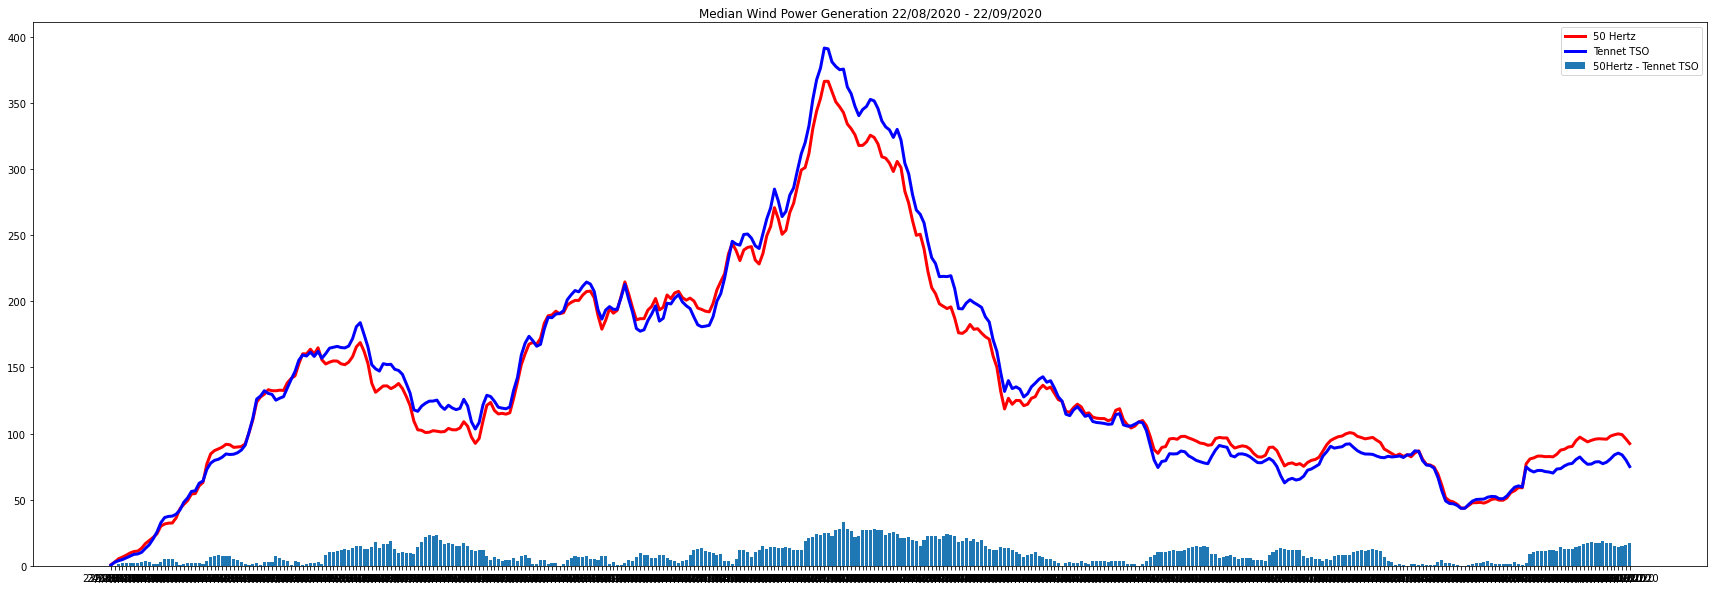

In [12]:
fig=plt.figure(figsize=(30,10))
ax=fig.add_subplot(1,1,1)
ax.plot(x,ymed_50h,'r',linewidth=3.0,label='50 Hertz')
ax.plot(x,ymed_tso,'b',linewidth=3.0,label='Tennet TSO')
ax.bar(x,np.abs(ymed_50h-ymed_tso),label='50Hertz - Tennet TSO')
ax.legend()
ax.set_title("Median Wind Power Generation 22/08/2020 - 22/09/2020")
plt.show

In [13]:
e=(np.abs(ymed_50h-ymed_tso))**2
e=e.sum()
rel=(np.abs(ymed_50h))**2
rel=rel.sum()
e_rel=100*e/rel
print("Relative error between 50 Hertz and Tennet TSO data: ",np.round(e_rel,2),"%")

Relative error between 50 Hertz and Tennet TSO data:  0.55 %


The calculation shows that there is an overall difference of 0.55% between the two datasets (in respect to 50 Hertz values). We can conclude that the wind power generation data is measured quite accurately by both companies since the deviation is under 1%.